<a href="https://colab.research.google.com/github/diogenesjusto/FIAP/blob/master/POS/IA/Feature%20Engineering/20240320_Aula3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Variáveis Categóricas

In [12]:
# Carga de bibliotecas
import pandas as pd
import numpy as np

In [5]:
# Carga de dados
df = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/dados_arvore_titanic.csv')

In [66]:
# Criação de dummies
dummy_pclass = pd.get_dummies(df['Pclass'], prefix='Classe')
df['Classe_1'] = dummy_pclass['Classe_1']
df['Classe_2'] = dummy_pclass['Classe_2']

dummy_sex = pd.get_dummies(df['Sex'])
df['Sex_female'] = dummy_sex['female']

# Preenchimento de nulos para idades
ageAvg = df['Age'].mean()
df['AgeNullTreat'] = df['Age'].fillna(ageAvg)

df['WomenChildren'] = np.where(
    df['Age']<14,
    1,
    np.where(
        df['Sex']=='female',1,0
      )
)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Classe_1,Classe_2,WomenChildren,Sex_female,AgeNullTreat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0,0,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,1,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,1,1,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,0,0,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1,0,0,27.000000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,1,1,19.000000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,1,1,29.699118
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0,0,26.000000


# 2. Discretização




In [49]:
dfDi = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/diamonds.csv')

# Análise de distribuição
dfDi[['price']].quantile(np.arange(0,1,0.25))

,price
0.00,326.00
0.25,950.00
0.50,2401.00
0.75,5324.25


In [24]:
# Discretização com mesma "largura"
!pip install feature_engine
from feature_engine.discretisation import EqualWidthDiscretiser

In [47]:
disc = EqualWidthDiscretiser(variables='price', bins=4, return_boundaries=True)
disc.fit(dfDi)
df_transformed = disc.transform(dfDi)
df_transformed.groupby("price").count()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price_disc
price,,,,,,,,,,,
"(-inf, 4950.25]",39013,39013,39013,39013,39013,39013,39013,39013,39013,39013,39013
"(14198.75, inf]",2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068
"(4950.25, 9574.5]",9285,9285,9285,9285,9285,9285,9285,9285,9285,9285,9285
"(9574.5, 14198.75]",3574,3574,3574,3574,3574,3574,3574,3574,3574,3574,3574


array([[<Axes: title={'center': 'price'}>]], dtype=object)

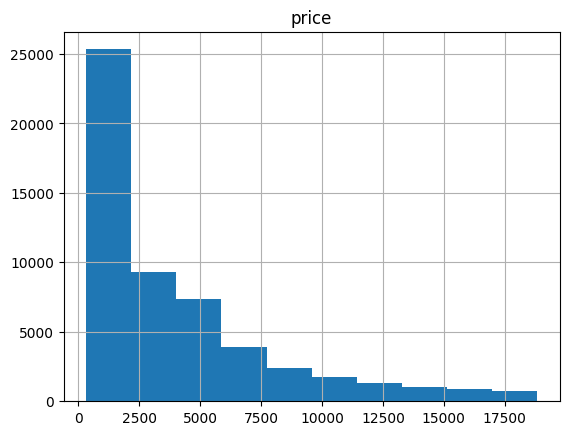

In [33]:
# Histograma
dfDi[['price']].hist()

In [45]:
# Discretização por frequência
from sklearn.preprocessing import KBinsDiscretizer

disc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
disc.fit(dfDi[['price']])
df_tranformed = disc.transform(dfDi[['price']])

dfDi['price_disc'] = df_tranformed
dfDi.groupby('price_disc').count()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
price_disc,,,,,,,,,,,
0.0,13483,13483,13483,13483,13483,13483,13483,13483,13483,13483,13483
1.0,13476,13476,13476,13476,13476,13476,13476,13476,13476,13476,13476
2.0,13496,13496,13496,13496,13496,13496,13496,13496,13496,13496,13496
3.0,13485,13485,13485,13485,13485,13485,13485,13485,13485,13485,13485


# 3. Feature Importance

3.1 Magnitude dos *coeficientes*

In [75]:
# Regressão Logística
from sklearn.linear_model import LogisticRegression

X = df[['AgeNullTreat', 'Sex_female', 'Classe_1', 'Classe_2']]
y = df['Survived']

modLogR = LogisticRegression().fit(X, y)

print(modLogR.coef_, modLogR.intercept_)

[[-0.03130271  2.49739569  2.15764244  1.09689503]] [-1.3352654]


In [84]:
# Regressão Linear
from sklearn.linear_model import LinearRegression
# Fonte: (1) PIBIU - ItauUnibanco - https://www.itau.com.br/itaubba-pt/analises-economicas/series-economicas
#        (2) https://melhoresrodovias.org.br/indice-abcr/

dfPib = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/SHIFT/Data/pib.csv")

# Teste de mudança de escala forçado em uma variável
dfPib['BRP_over'] = dfPib['BRP']*1000

X = dfPib[['BRP_over', 'BRL']]
y = dfPib['PIB']

modLin = LinearRegression().fit(X,y)

print(modLin.coef_, modLin.intercept_)

[0.00057476 0.25862772] 19.21680181578671


3.2 Decision Split

In [106]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier

X = df[['AgeNullTreat', 'Sex_female', 'Classe_1', 'Classe_2']]
y = df['Survived']

modRF = RandomForestClassifier(random_state=2).fit(X,y)
print(modRF.feature_importances_, modRF.feature_names_in_)

[0.41869598 0.41457502 0.10426106 0.06246793] ['AgeNullTreat' 'Sex_female' 'Classe_1' 'Classe_2']


<Axes: >

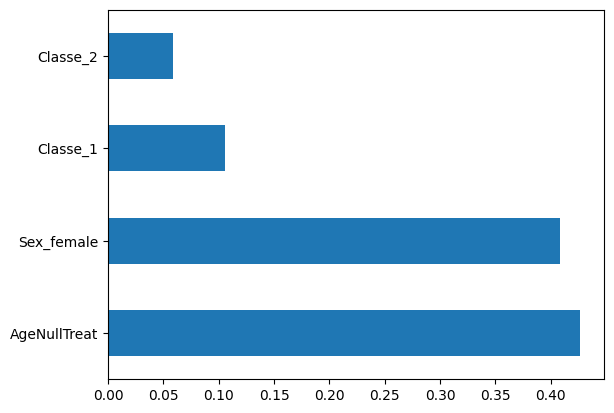

In [89]:
# Visualização Gráfica
feature_importance = pd.Series(modRF.feature_importances_, X.columns)
feature_importance.nlargest(4).plot(kind='barh')

3.3 Permutation

Text(0.5, 0, 'Permutation Importance')

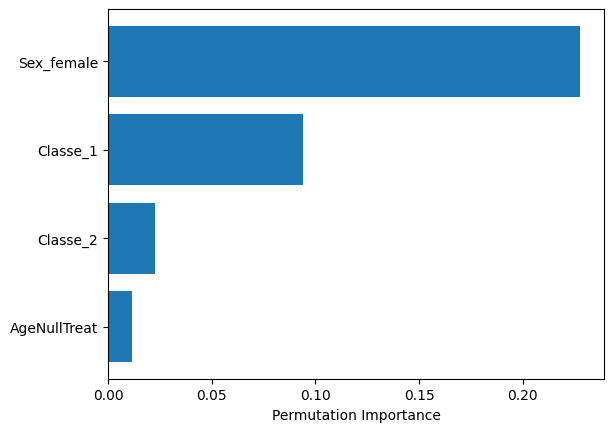

In [112]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, y, test_size=0.25, random_state=12)
#modRF2 = RandomForestClassifier(random_state=2).fit(X_treino,Y_treino)
modLogR2 = LogisticRegression().fit(X_treino,Y_treino)

#perm_importance = permutation_importance(modRF2, X_teste, Y_teste)
perm_importance = permutation_importance(modLogR2, X_teste, Y_teste)

ordem_idx = perm_importance.importances_mean.argsort()
plt.barh(X_treino.columns[ordem_idx], perm_importance.importances_mean[ordem_idx])
plt.xlabel("Permutation Importance")

In [113]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Classe_1,Classe_2,WomenChildren,Sex_female,AgeNullTreat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0,0,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,1,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,1,1,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,0,0,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1,0,0,27.000000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,1,1,19.000000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,1,1,29.699118
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0,0,26.000000


# AutoML ( Automatization of ML tasks )
Feature Engineering with pycaret

In [114]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.5 

In [5]:
from pycaret.classification import *
import pandas as pd

In [11]:
# Carga de dados
df = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/dados_arvore_titanic.csv')

df['Pclass']=df['Pclass'].apply(str)

In [18]:
# Configuração do pycaret
s = setup(df, target='Survived', ignore_features=['Name', 'Cabin', 'Ticket', 'PassengerId'])

,Description,Value
0,Session id,8299
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 12)"
5,Transformed train set shape,"(623, 12)"
6,Transformed test set shape,"(268, 12)"
7,Ignore features,4
8,Numeric features,4
9,Categorical features,3


/usr/local/lib/python3.10/dist-packages/pycaret/internal/metrics.py:51: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


In [19]:
result=pd.concat([s.X_train, s.X_train_transformed],axis=1, join='inner')
#display(result)

s.X_train_transformed

,Pclass_1,Pclass_3,Pclass_2,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
842,1.0,0.0,0.0,0.0,30.000000,0.0,0.0,31.000000,1.0,0.0,0.0
171,0.0,1.0,0.0,1.0,4.000000,4.0,1.0,29.125000,0.0,1.0,0.0
798,0.0,1.0,0.0,1.0,30.000000,0.0,0.0,7.229200,1.0,0.0,0.0
697,0.0,1.0,0.0,0.0,29.403004,0.0,0.0,7.733300,0.0,1.0,0.0
738,0.0,1.0,0.0,1.0,29.403004,0.0,0.0,7.895800,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
549,0.0,0.0,1.0,1.0,8.000000,1.0,1.0,36.750000,0.0,0.0,1.0
865,0.0,0.0,1.0,0.0,42.000000,0.0,0.0,13.000000,0.0,0.0,1.0
747,0.0,0.0,1.0,0.0,30.000000,0.0,0.0,13.000000,0.0,0.0,1.0
550,1.0,0.0,0.0,1.0,17.000000,0.0,2.0,110.883301,1.0,0.0,0.0


In [20]:
# Execução e comparação de modelos
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8264,0.0000,0.7322,0.8053,0.7640,0.6274,0.6321,0.5910
gbc,Gradient Boosting Classifier,0.8185,0.0000,0.6819,0.8174,0.7398,0.6029,0.6119,0.2130
xgboost,Extreme Gradient Boosting,0.8024,0.0000,0.7114,0.7623,0.7342,0.5774,0.5801,0.1520
lr,Logistic Regression,0.8008,0.0000,0.6817,0.7758,0.7228,0.5687,0.5740,0.9980
ridge,Ridge Classifier,0.7992,0.0000,0.6817,0.7690,0.7207,0.5652,0.5694,0.1010
lda,Linear Discriminant Analysis,0.7992,0.0000,0.6817,0.7690,0.7207,0.5652,0.5694,0.1800
ada,Ada Boost Classifier,0.7928,0.0000,0.7072,0.7445,0.7233,0.5581,0.5605,0.1880
rf,Random Forest Classifier,0.7801,0.0000,0.6861,0.7250,0.7032,0.5291,0.5311,0.2700
et,Extra Trees Classifier,0.7657,0.0000,0.6650,0.7052,0.6824,0.4975,0.4997,0.2650
dt,Decision Tree Classifier,0.7495,0.0000,0.6859,0.6710,0.6742,0.4716,0.4755,0.1440


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [22]:
# análise do melhor modelo
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…